In [1]:
#親クラスの読み込み
from DP import DataProcessor
from Result import Results
from HR import HorseResults
from Ped import Peds
from ST import ShutubaTable
from JR import JockeyResults
from TR import TrainerResults
import update_data
import pickle
import bz2
from sqlalchemy import create_engine

In [2]:
#ライブラリをインポート
import pandas as pd
import numpy as np
import datetime
from tqdm.notebook import tqdm
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import requests
from bs4 import BeautifulSoup
import time
from tqdm.notebook import tqdm
import re
from urllib.request import urlopen
import optuna.integration.lightgbm as lgb_o
import warnings
from sklearn.impute import SimpleImputer


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [3]:
r = Results.read_pickle(['data/race_results_all.pickle'])
hr = HorseResults.read_pickle(['data/horse_results_all.pickle'])
p = Peds.read_pickle(['data/peds_all.pickle'])
jr = JockeyResults.read_pickle(['data/jockey_results.pickle'])
tr = TrainerResults.read_pickle(['data/trainer_results.pickle'])

In [4]:
r.preprocessing()

In [6]:
r.data_p.head()

,rank,odds,favorite,frame_number,horse_number,sex,age,weight_j,prize,race_turn,course_len,weather,race_type,race_condition,n_horses,date,race_park,horse_id,jockey_id,trainer_id
201101010101,1,4.7,3.0,2,2,牡,2,54.0,500.0,右,18,晴,芝,良,7,2011-08-13,札幌,2009105006,01019,00379
201101010101,2,3.4,2.0,3,3,牡,2,54.0,500.0,右,18,晴,芝,良,7,2011-08-13,札幌,2009100577,05203,01061
201101010101,3,2.1,1.0,5,5,牡,2,54.0,500.0,右,18,晴,芝,良,7,2011-08-13,札幌,2009102908,01093,01089
201101010101,4,7.0,4.0,4,4,牡,2,54.0,500.0,右,18,晴,芝,良,7,2011-08-13,札幌,2009109159,01095,01075
201101010101,5,17.5,5.0,1,1,牝,2,54.0,500.0,右,18,晴,芝,良,7,2011-08-13,札幌,2009105263,01127,01026


In [7]:
r.merge_horse_results(hr)

  0%|          | 0/1154 [00:00<?, ?it/s]

In [8]:
p.encode()
r.merge_peds(p.peds_e)

In [9]:
r.merge_jockey(jr)

  0%|          | 0/1154 [00:00<?, ?it/s]

In [10]:
r.merge_trainer(tr)

  0%|          | 0/1154 [00:00<?, ?it/s]

In [11]:
r.data_t.head()

,rank,odds,favorite,frame_number,horse_number,sex,age,weight_j,prize,race_turn,course_len,weather,race_type,race_condition,n_horses,date,race_park,horse_id,jockey_id,trainer_id,rank_1R_before,money_1R_before,favorite_1R_before,last_1R_before,odds_1R_before,final_corner_1R_before,rank_2R_before,money_2R_before,favorite_2R_before,last_2R_before,odds_2R_before,final_corner_2R_before,rank_3R_before,money_3R_before,favorite_3R_before,last_3R_before,odds_3R_before,final_corner_3R_before,course_len_all,time_rank_p,interval,course_len_dif,peds_0,peds_4,win_rate_1_1Y_before_j,win_rate_3_1Y_before_j,prize_1Y_before_j,win_rate_1_1Y_before_t,win_rate_3_1Y_before_t,prize_1Y_before_t
201101010101,1,4.7,3.0,2,2,牡,2,54.0,500.0,右,18,晴,芝,良,7,2011-08-13,札幌,2009105006,01019,00379,8.0,0.0,8.0,34.7,28.8,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,1.0,34.0,4.0,779,1457,0.084,0.240,96905.1,0.062,0.140,16330.6
201101010101,2,3.4,2.0,3,3,牡,2,54.0,500.0,右,18,晴,芝,良,7,2011-08-13,札幌,2009100577,05203,01061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,763,1637,0.119,0.333,188832.6,0.138,0.400,52106.2
201101010101,3,2.1,1.0,5,5,牡,2,54.0,500.0,右,18,晴,芝,良,7,2011-08-13,札幌,2009102908,01093,01089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,789,1457,0.086,0.262,137964.6,0.051,0.168,23638.6
201101010101,4,7.0,4.0,4,4,牡,2,54.0,500.0,右,18,晴,芝,良,7,2011-08-13,札幌,2009109159,01095,01075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,779,1642,0.069,0.194,95243.0,0.087,0.292,108027.3
201101010101,5,17.5,5.0,1,1,牝,2,54.0,500.0,右,18,晴,芝,良,7,2011-08-13,札幌,2009105263,01127,01026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,969,1891,0.110,0.284,114614.3,0.062,0.167,23687.4


In [15]:
r.process_categorical() 

In [53]:
r.data_c.head()

,rank,odds,favorite,frame_number,horse_number,age,weight_j,prize,course_len,n_horses,date,horse_id,jockey_id,trainer_id,rank_1R_before,money_1R_before,favorite_1R_before,last_1R_before,odds_1R_before,final_corner_1R_before,rank_2R_before,money_2R_before,favorite_2R_before,last_2R_before,odds_2R_before,final_corner_2R_before,rank_3R_before,money_3R_before,favorite_3R_before,last_3R_before,odds_3R_before,final_corner_3R_before,course_len_all,time_rank_p,interval,course_len_dif,peds_0,peds_4,win_rate_1_1Y_before_j,win_rate_3_1Y_before_j,prize_1Y_before_j,win_rate_1_1Y_before_t,win_rate_3_1Y_before_t,prize_1Y_before_t,race_turn_右,race_turn_左,race_turn_直,race_turn_芝,race_turn_ー,weather_晴,weather_曇,weather_雨,weather_小雨,weather_雪,weather_小雪,race_type_芝,race_type_ダート,race_type_障害,race_condition_良,race_condition_稍重,race_condition_重,race_condition_不良,sex_牡,sex_牝,sex_セ,race_park_札幌,race_park_新潟,race_park_小倉,race_park_中山,race_park_阪神,race_park_函館,race_park_京都,race_park_東京,race_park_中京,race_park_福島
201101010101,1,4.7,3.0,2,2,2,54.0,500.0,18,7,2011-08-13,2009105006,01019,00379,8.0,0.0,8.0,34.7,28.8,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,1.0,34.0,4.0,779,1457,0.084,0.240,96905.1,0.062,0.140,16330.6,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
201101010101,2,3.4,2.0,3,3,2,54.0,500.0,18,7,2011-08-13,2009100577,05203,01061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,763,1637,0.119,0.333,188832.6,0.138,0.400,52106.2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
201101010101,3,2.1,1.0,5,5,2,54.0,500.0,18,7,2011-08-13,2009102908,01093,01089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,789,1457,0.086,0.262,137964.6,0.051,0.168,23638.6,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
201101010101,4,7.0,4.0,4,4,2,54.0,500.0,18,7,2011-08-13,2009109159,01095,01075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,779,1642,0.069,0.194,95243.0,0.087,0.292,108027.3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
201101010101,5,17.5,5.0,1,1,2,54.0,500.0,18,7,2011-08-13,2009105263,01127,01026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,969,1891,0.110,0.284,114614.3,0.062,0.167,23687.4,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [49]:
r.data_e = r.data_c[((r.data_c["rank"]==0) & (r.data_c["odds"]<=32.0)) | (r.data_c["rank"]==1)]

In [50]:
r.data_d = r.data_e[((r.data_e["rank"]==0) & (r.data_e["favorite"]<=10)) | (r.data_e["rank"]==1)]

In [82]:
r.data_e = r.data_c[((r.data_c["rank"]<=3) & (r.data_c["odds"]<=32.0)) | (r.data_c["rank"]>3)]

In [83]:
r.data_d = r.data_e[((r.data_e["rank"]<=3) & (r.data_e["favorite"]<=10)) | (r.data_e["rank"]>3)]

In [59]:
r.data_d.head()

,rank,odds,favorite,frame_number,horse_number,age,weight_j,prize,course_len,n_horses,date,horse_id,jockey_id,trainer_id,rank_1R_before,money_1R_before,favorite_1R_before,last_1R_before,odds_1R_before,final_corner_1R_before,rank_2R_before,money_2R_before,favorite_2R_before,last_2R_before,odds_2R_before,final_corner_2R_before,rank_3R_before,money_3R_before,favorite_3R_before,last_3R_before,odds_3R_before,final_corner_3R_before,course_len_all,time_rank_p,interval,course_len_dif,peds_0,peds_4,win_rate_1_1Y_before_j,win_rate_3_1Y_before_j,prize_1Y_before_j,win_rate_1_1Y_before_t,win_rate_3_1Y_before_t,prize_1Y_before_t,race_turn_右,race_turn_左,race_turn_直,race_turn_芝,race_turn_ー,weather_晴,weather_曇,weather_雨,weather_小雨,weather_雪,weather_小雪,race_type_芝,race_type_ダート,race_type_障害,race_condition_良,race_condition_稍重,race_condition_重,race_condition_不良,sex_牡,sex_牝,sex_セ,race_park_札幌,race_park_新潟,race_park_小倉,race_park_中山,race_park_阪神,race_park_函館,race_park_京都,race_park_東京,race_park_中京,race_park_福島
201101010101,1,4.7,3.0,2,2,2,54.0,500.0,18,7,2011-08-13,2009105006,01019,00379,8.0,0.0,8.0,34.7,28.8,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,1.0,34.0,4.0,779,1457,0.084,0.240,96905.1,0.062,0.140,16330.6,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
201101010101,2,3.4,2.0,3,3,2,54.0,500.0,18,7,2011-08-13,2009100577,05203,01061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,763,1637,0.119,0.333,188832.6,0.138,0.400,52106.2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
201101010101,3,2.1,1.0,5,5,2,54.0,500.0,18,7,2011-08-13,2009102908,01093,01089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,789,1457,0.086,0.262,137964.6,0.051,0.168,23638.6,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
201101010101,4,7.0,4.0,4,4,2,54.0,500.0,18,7,2011-08-13,2009109159,01095,01075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,779,1642,0.069,0.194,95243.0,0.087,0.292,108027.3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
201101010101,5,17.5,5.0,1,1,2,54.0,500.0,18,7,2011-08-13,2009105263,01127,01026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,969,1891,0.110,0.284,114614.3,0.062,0.167,23687.4,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [84]:
df_tmp_moeny = r.data_d[["money_1R_before","money_2R_before","money_3R_before"]]
df_money = df_tmp_moeny.mean(axis='columns') 
r.data_d["money_ave"] = df_money
r.data_d["money_rank"]=r.data_d.groupby(level=0)["money_ave"].rank(ascending=False,method="max")
r.data_d.drop(["money_1R_before","money_2R_before","money_3R_before"],inplace=True,axis=1)

In [85]:
r.data_d.drop(["favorite_1R_before","favorite_2R_before","favorite_3R_before"],inplace=True,axis=1)

In [86]:
df_tmp_final = r.data_d[["final_corner_1R_before","final_corner_2R_before","final_corner_3R_before"]]
df_final = df_tmp_final.mean(axis='columns') 
r.data_d["final_ave"] = df_final
r.data_d["final_rank"]=r.data_d.groupby(level=0)["final_ave"].rank(ascending=True,method="max")
r.data_d.drop(["final_corner_1R_before","final_corner_2R_before","final_corner_3R_before"],inplace=True,axis=1)

In [87]:
df_tmp_last = r.data_d[["last_1R_before","last_2R_before","last_3R_before"]]
df_last = df_tmp_last.mean(axis='columns') 
r.data_d["last_ave"] = df_last
r.data_d["last_rank"]=r.data_d.groupby(level=0)["last_ave"].rank(ascending=True,method="max")
r.data_d.drop(["last_1R_before","last_2R_before","last_3R_before"],inplace=True,axis=1)

In [89]:
r.data_d["final_plus_rank"] = r.data_d["final_rank"] + r.data_d["last_rank"]

In [94]:
df_tmp_rank = r.data_d[["rank_1R_before","rank_2R_before","rank_3R_before"]]
df_rank = df_tmp_rank.mean(axis='columns') 
r.data_d["rank_ave"] = df_rank
r.data_d["rank_rank"]=r.data_d.groupby(level=0)["rank_ave"].rank(ascending=True,method="max")
r.data_d.drop(["rank_1R_before","rank_2R_before","rank_3R_before"],inplace=True,axis=1)

In [96]:
r.data_d.drop(["prize"],inplace=True,axis=1)

In [98]:
r.data_d.drop(["frame_number"],inplace=True,axis=1)

In [102]:
tmp_column = ["rank","money_ave","money_rank","final_ave","final_rank","last_ave","last_rank","final_plus_rank","rank_ave","rank_rank"]

In [104]:
tmp_df = r.data_d[tmp_column]

In [107]:
r.data_d.drop(["money_ave","final_ave","final_rank","last_ave","last_rank","rank_ave"],inplace=True,axis=1)

In [108]:
r.data_d.head()

,rank,odds,favorite,horse_number,age,weight_j,course_len,n_horses,date,horse_id,jockey_id,trainer_id,odds_1R_before,odds_2R_before,odds_3R_before,course_len_all,time_rank_p,interval,course_len_dif,peds_0,peds_4,win_rate_1_1Y_before_j,win_rate_3_1Y_before_j,prize_1Y_before_j,win_rate_1_1Y_before_t,win_rate_3_1Y_before_t,prize_1Y_before_t,race_turn_右,race_turn_左,race_turn_直,race_turn_芝,race_turn_ー,weather_晴,weather_曇,weather_雨,weather_小雨,weather_雪,weather_小雪,race_type_芝,race_type_ダート,race_type_障害,race_condition_良,race_condition_稍重,race_condition_重,race_condition_不良,sex_牡,sex_牝,sex_セ,race_park_札幌,race_park_新潟,race_park_小倉,race_park_中山,race_park_阪神,race_park_函館,race_park_京都,race_park_東京,race_park_中京,race_park_福島,money_rank,final_plus_rank,rank_rank
201101010101,1,4.7,3.0,2,2,54.0,18,7,2011-08-13,2009105006,01019,00379,28.8,NaN,NaN,14.0,1.0,34.0,4.0,779,1457,0.084,0.240,96905.1,0.062,0.140,16330.6,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1.0,2.0,1.0
201101010101,2,3.4,2.0,3,2,54.0,18,7,2011-08-13,2009100577,05203,01061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,763,1637,0.119,0.333,188832.6,0.138,0.400,52106.2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
201101010101,3,2.1,1.0,5,2,54.0,18,7,2011-08-13,2009102908,01093,01089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,789,1457,0.086,0.262,137964.6,0.051,0.168,23638.6,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
201101010101,4,7.0,4.0,4,2,54.0,18,7,2011-08-13,2009109159,01095,01075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,779,1642,0.069,0.194,95243.0,0.087,0.292,108027.3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
201101010101,5,17.5,5.0,1,2,54.0,18,7,2011-08-13,2009105263,01127,01026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,969,1891,0.110,0.284,114614.3,0.062,0.167,23687.4,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

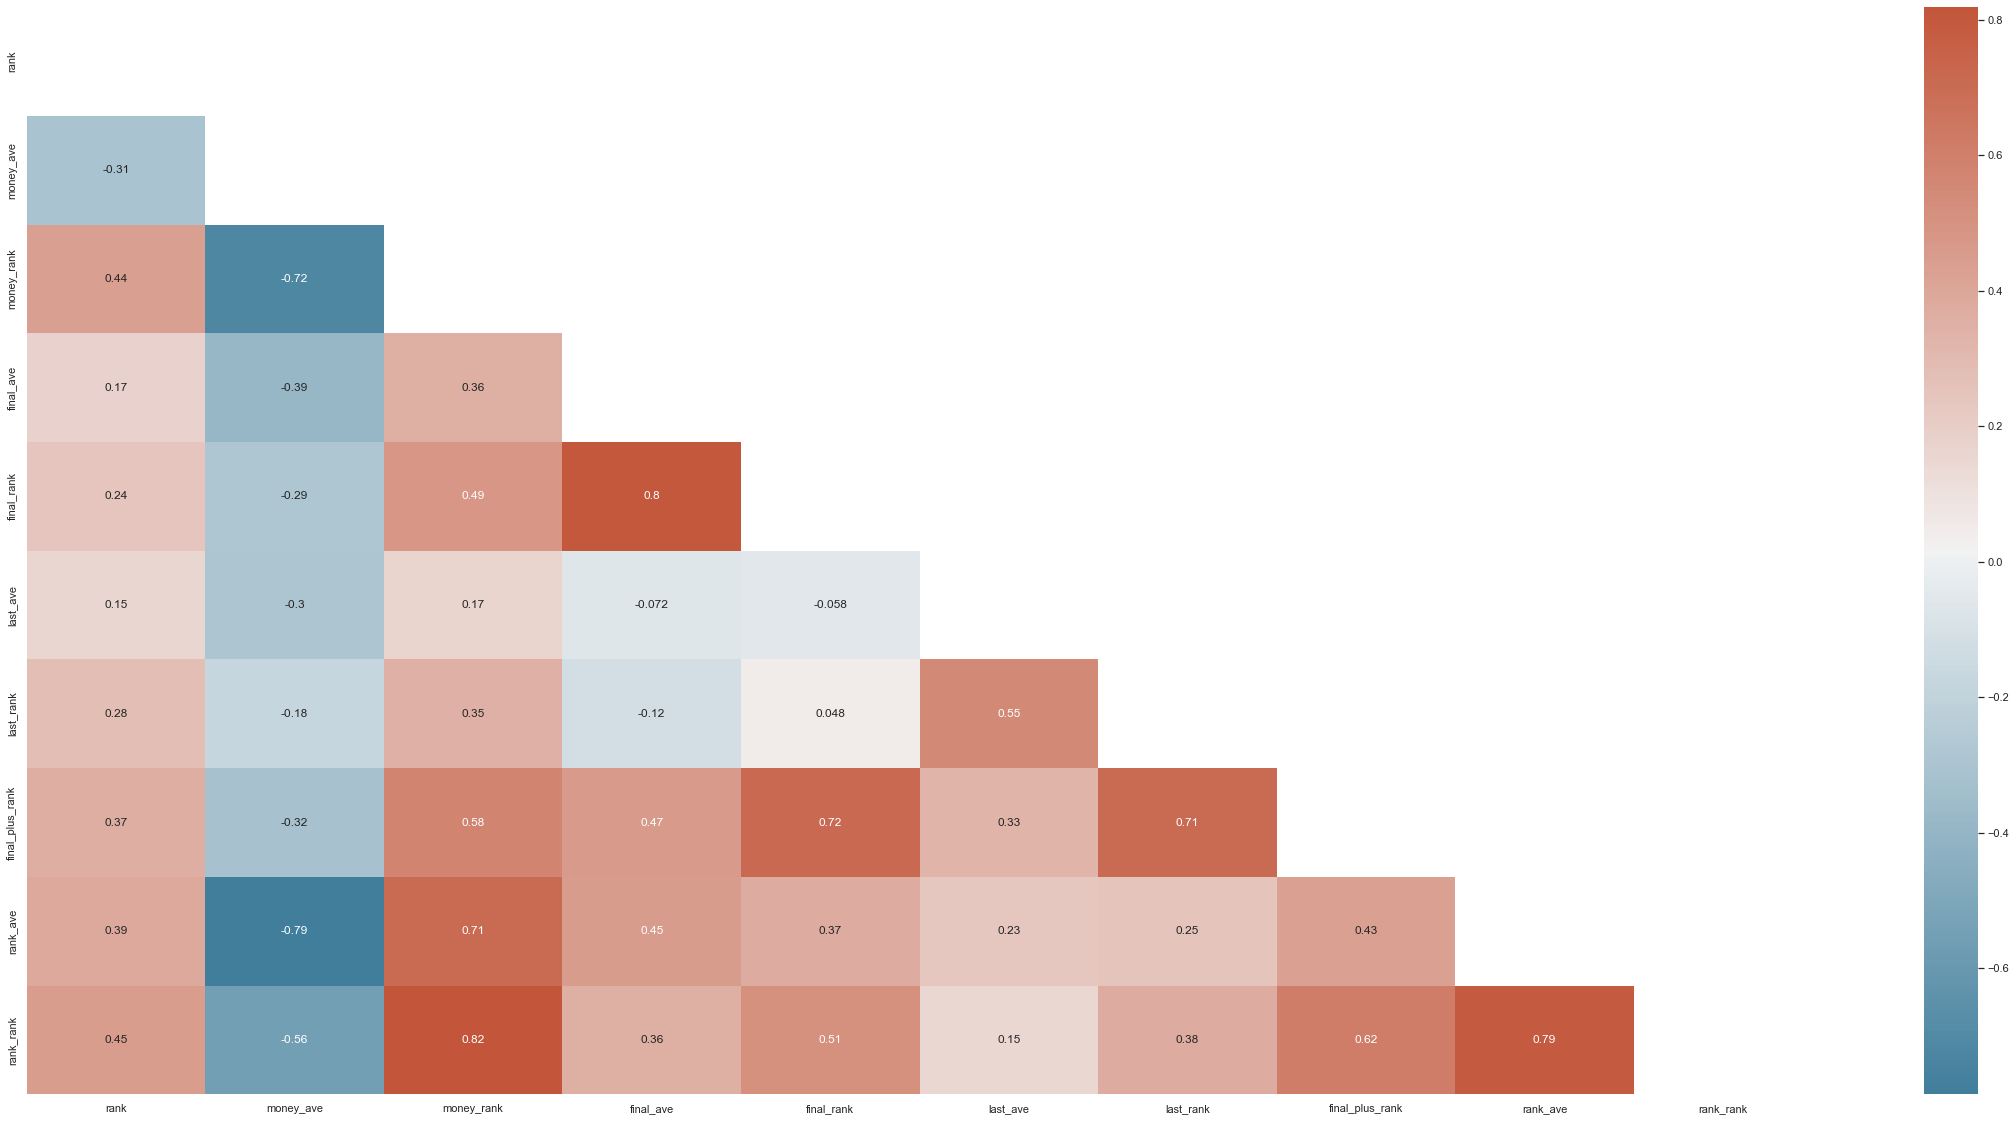

In [106]:
sns.set_theme(style="white")
mask = np.triu(np.ones_like(tmp_df.corr(method="spearman"), dtype=bool))
f, ax = plt.subplots(figsize=(40, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(tmp_df.corr(method="spearman"),mask = mask, annot = True,cmap = cmap)

In [109]:
def rank(x):
    if x >= 1 and x <= 3:
        return 0
    else:
        return 1
r.data_d['rank'] = r.data_d['rank'].map(lambda x: rank(x))


In [114]:
def split_data(df, test_size=0.3):
    sorted_id_list = df.sort_values("date").index.unique()
    train_id_list = sorted_id_list[: round(len(sorted_id_list) * (1 - test_size))]
    test_id_list = sorted_id_list[round(len(sorted_id_list) * (1 - test_size)) :]
    train = df.loc[train_id_list]
    test = df.loc[test_id_list]
    return train, test

train, test = split_data(r.data_d)

train, valid = split_data(train)

X_train = train.drop(['rank', 'date',"horse_id","jockey_id","trainer_id","favorite","odds"], axis=1)
y_train = train['rank']
X_valid = valid.drop(['rank', 'date',"horse_id","jockey_id","trainer_id","favorite","odds"], axis=1)
y_valid = valid['rank']

#データセットを作成
lgb_train = lgb_o.Dataset(X_train.values, y_train.values)
lgb_valid = lgb_o.Dataset(X_valid.values, y_valid.values)

In [115]:
#説明変数と目的変数に分ける。dateはこの後不要なので省く。
X_train = train.drop(["rank", "date","horse_id","jockey_id","trainer_id","favorite","odds"], axis=1)
y_train = train['rank']
X_test = test.drop(["rank", "date","horse_id","jockey_id","trainer_id","favorite","odds"], axis=1)
y_test = test['rank']

In [116]:
params = {
    'objective': 'binary', #今回は0or1の二値予測なのでbinaryを指定
    'random_state': 100,
    'metric': 'auc',
    'boosting': 'gbdt'
         }

In [117]:
lgb_clf_o = lgb_o.train(params, lgb_train,
                        valid_sets=(lgb_train, lgb_valid),
                        verbose_eval=100,
                        early_stopping_rounds=10)

[I 2021-11-13 11:04:38,848] A new study created in memory with name: no-name-ceb3f4aa-4f2f-49ef-a71f-712da7b1e483
feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.784865	valid_1's auc: 0.81447


feature_fraction, val_score: 0.814532:  14%|#4        | 1/7 [00:04<00:24,  4.11s/it]

Early stopping, best iteration is:
[116]	valid_0's auc: 0.787683	valid_1's auc: 0.814532
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


feature_fraction, val_score: 0.814532:  29%|##8       | 2/7 [00:07<00:18,  3.66s/it]

Early stopping, best iteration is:
[80]	valid_0's auc: 0.781156	valid_1's auc: 0.813858
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


feature_fraction, val_score: 0.814532:  43%|####2     | 3/7 [00:10<00:14,  3.59s/it]

[100]	valid_0's auc: 0.783332	valid_1's auc: 0.814364
Early stopping, best iteration is:
[94]	valid_0's auc: 0.782309	valid_1's auc: 0.814531
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


feature_fraction, val_score: 0.814532:  57%|#####7    | 4/7 [00:13<00:09,  3.31s/it]

Early stopping, best iteration is:
[78]	valid_0's auc: 0.780043	valid_1's auc: 0.814395
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.78269	valid_1's auc: 0.815163


feature_fraction, val_score: 0.815320:  71%|#######1  | 5/7 [00:17<00:06,  3.42s/it]

Early stopping, best iteration is:
[106]	valid_0's auc: 0.783687	valid_1's auc: 0.81532
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.783072	valid_1's auc: 0.814505


feature_fraction, val_score: 0.815320:  86%|########5 | 6/7 [00:20<00:03,  3.45s/it]

Early stopping, best iteration is:
[108]	valid_0's auc: 0.78431	valid_1's auc: 0.814527
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


feature_fraction, val_score: 0.815320: 100%|##########| 7/7 [00:24<00:00,  3.44s/it]


[100]	valid_0's auc: 0.784487	valid_1's auc: 0.814433
Early stopping, best iteration is:
[92]	valid_0's auc: 0.783152	valid_1's auc: 0.814465


num_leaves, val_score: 0.815320:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.815320:   5%|5         | 1/20 [00:03<01:02,  3.27s/it]

Early stopping, best iteration is:
[50]	valid_0's auc: 0.819887	valid_1's auc: 0.812911
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.815320:  10%|#         | 2/20 [00:06<00:54,  3.01s/it]

Early stopping, best iteration is:
[61]	valid_0's auc: 0.793594	valid_1's auc: 0.81424
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.815599:  15%|#5        | 3/20 [00:09<00:55,  3.24s/it]

Early stopping, best iteration is:
[88]	valid_0's auc: 0.800498	valid_1's auc: 0.815599
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.815599:  20%|##        | 4/20 [00:12<00:51,  3.20s/it]

Early stopping, best iteration is:
[50]	valid_0's auc: 0.808776	valid_1's auc: 0.813658
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.815599:  25%|##5       | 5/20 [00:16<00:48,  3.25s/it]

Early stopping, best iteration is:
[50]	valid_0's auc: 0.817672	valid_1's auc: 0.812959
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.815599:  30%|###       | 6/20 [00:19<00:44,  3.19s/it]

Early stopping, best iteration is:
[50]	valid_0's auc: 0.81171	valid_1's auc: 0.813306
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.815599:  35%|###5      | 7/20 [00:22<00:42,  3.26s/it]

[100]	valid_0's auc: 0.787032	valid_1's auc: 0.814947
Early stopping, best iteration is:
[91]	valid_0's auc: 0.785068	valid_1's auc: 0.815006
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.815599:  40%|####      | 8/20 [00:26<00:40,  3.37s/it]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.803184	valid_1's auc: 0.814007
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.815599:  45%|####5     | 9/20 [00:29<00:37,  3.41s/it]

Early stopping, best iteration is:
[73]	valid_0's auc: 0.803378	valid_1's auc: 0.814155
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.815599:  50%|#####     | 10/20 [00:32<00:33,  3.36s/it]

Early stopping, best iteration is:
[55]	valid_0's auc: 0.82258	valid_1's auc: 0.81283
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.766376	valid_1's auc: 0.812292
[200]	valid_0's auc: 0.772759	valid_1's auc: 0.814027


num_leaves, val_score: 0.815599:  55%|#####5    | 11/20 [00:38<00:35,  3.94s/it]

Early stopping, best iteration is:
[250]	valid_0's auc: 0.775106	valid_1's auc: 0.814236
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.778665	valid_1's auc: 0.815093


num_leaves, val_score: 0.815599:  60%|######    | 12/20 [00:41<00:30,  3.80s/it]

Early stopping, best iteration is:
[115]	valid_0's auc: 0.780866	valid_1's auc: 0.815383
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.815599:  65%|######5   | 13/20 [00:44<00:25,  3.64s/it]

[100]	valid_0's auc: 0.788388	valid_1's auc: 0.815311
Early stopping, best iteration is:
[91]	valid_0's auc: 0.786438	valid_1's auc: 0.815378
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.761222	valid_1's auc: 0.809722
[200]	valid_0's auc: 0.766074	valid_1's auc: 0.81207
[300]	valid_0's auc: 0.768945	valid_1's auc: 0.813137


num_leaves, val_score: 0.815599:  70%|#######   | 14/20 [00:52<00:28,  4.74s/it]

Early stopping, best iteration is:
[388]	valid_0's auc: 0.77106	valid_1's auc: 0.813727
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.815599:  75%|#######5  | 15/20 [00:55<00:21,  4.28s/it]

Early stopping, best iteration is:
[89]	valid_0's auc: 0.792399	valid_1's auc: 0.815352
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.815599:  80%|########  | 16/20 [00:58<00:15,  3.80s/it]

Early stopping, best iteration is:
[50]	valid_0's auc: 0.800311	valid_1's auc: 0.813583
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.815599:  85%|########5 | 17/20 [01:01<00:10,  3.65s/it]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.797269	valid_1's auc: 0.814962
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.815599:  90%|######### | 18/20 [01:04<00:07,  3.53s/it]

Early stopping, best iteration is:
[49]	valid_0's auc: 0.828591	valid_1's auc: 0.812144
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.773235	valid_1's auc: 0.814522


num_leaves, val_score: 0.815599:  95%|#########5| 19/20 [01:08<00:03,  3.64s/it]

Early stopping, best iteration is:
[150]	valid_0's auc: 0.778577	valid_1's auc: 0.81515
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.780718	valid_1's auc: 0.814779


num_leaves, val_score: 0.815599: 100%|##########| 20/20 [01:12<00:00,  3.64s/it]


Early stopping, best iteration is:
[157]	valid_0's auc: 0.789589	valid_1's auc: 0.815335


bagging, val_score: 0.815599:   0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.815599:  10%|#         | 1/10 [00:03<00:28,  3.21s/it]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.792462	valid_1's auc: 0.814691
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.815599:  20%|##        | 2/10 [00:06<00:24,  3.04s/it]

Early stopping, best iteration is:
[62]	valid_0's auc: 0.789598	valid_1's auc: 0.813516
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.815599:  30%|###       | 3/10 [00:10<00:24,  3.44s/it]

Early stopping, best iteration is:
[88]	valid_0's auc: 0.799356	valid_1's auc: 0.814581
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.815599:  40%|####      | 4/10 [00:12<00:19,  3.20s/it]

Early stopping, best iteration is:
[61]	valid_0's auc: 0.789033	valid_1's auc: 0.81233
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.815599:  50%|#####     | 5/10 [00:16<00:17,  3.44s/it]

[100]	valid_0's auc: 0.803649	valid_1's auc: 0.814322
Early stopping, best iteration is:
[94]	valid_0's auc: 0.801738	valid_1's auc: 0.814554
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.815599:  60%|######    | 6/10 [00:19<00:12,  3.08s/it]

Early stopping, best iteration is:
[50]	valid_0's auc: 0.783234	valid_1's auc: 0.811174
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.815599:  70%|#######   | 7/10 [00:23<00:10,  3.35s/it]

Early stopping, best iteration is:
[76]	valid_0's auc: 0.795981	valid_1's auc: 0.814099
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.815599:  80%|########  | 8/10 [00:26<00:06,  3.31s/it]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.792622	valid_1's auc: 0.814927
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.815599:  90%|######### | 9/10 [00:29<00:03,  3.25s/it]

Early stopping, best iteration is:
[65]	valid_0's auc: 0.791411	valid_1's auc: 0.813946
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


bagging, val_score: 0.815599: 100%|##########| 10/10 [00:32<00:00,  3.20s/it]


Early stopping, best iteration is:
[53]	valid_0's auc: 0.78581	valid_1's auc: 0.812737


feature_fraction_stage2, val_score: 0.815599:   0%|          | 0/3 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.815599:  33%|###3      | 1/3 [00:03<00:07,  3.52s/it]

Early stopping, best iteration is:
[88]	valid_0's auc: 0.800498	valid_1's auc: 0.815599
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.815599:  67%|######6   | 2/3 [00:06<00:03,  3.36s/it]

Early stopping, best iteration is:
[71]	valid_0's auc: 0.795565	valid_1's auc: 0.814836
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


feature_fraction_stage2, val_score: 0.815599: 100%|##########| 3/3 [00:09<00:00,  3.29s/it]


Early stopping, best iteration is:
[72]	valid_0's auc: 0.79564	valid_1's auc: 0.814654


regularization_factors, val_score: 0.815599:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.79931	valid_1's auc: 0.815364


regularization_factors, val_score: 0.815599:   5%|5         | 1/20 [00:04<01:24,  4.43s/it]

Early stopping, best iteration is:
[109]	valid_0's auc: 0.801589	valid_1's auc: 0.815495
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.815599:  10%|#         | 2/20 [00:07<01:08,  3.82s/it]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.797848	valid_1's auc: 0.814752
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.800461	valid_1's auc: 0.815405


regularization_factors, val_score: 0.815599:  15%|#5        | 3/20 [00:11<01:07,  3.95s/it]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.799969	valid_1's auc: 0.815449
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.815599:  20%|##        | 4/20 [00:15<01:02,  3.90s/it]

[100]	valid_0's auc: 0.802078	valid_1's auc: 0.815304
Early stopping, best iteration is:
[94]	valid_0's auc: 0.800392	valid_1's auc: 0.815387
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.815599:  25%|##5       | 5/20 [00:19<00:57,  3.82s/it]

[100]	valid_0's auc: 0.804688	valid_1's auc: 0.814886
Early stopping, best iteration is:
[91]	valid_0's auc: 0.801803	valid_1's auc: 0.81494
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.815599:  30%|###       | 6/20 [00:23<00:52,  3.76s/it]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.798361	valid_1's auc: 0.815036
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.815599:  35%|###5      | 7/20 [00:26<00:48,  3.70s/it]

Early stopping, best iteration is:
[81]	valid_0's auc: 0.798359	valid_1's auc: 0.815042
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.799368	valid_1's auc: 0.815743


regularization_factors, val_score: 0.815815:  40%|####      | 8/20 [00:31<00:47,  3.94s/it]

Early stopping, best iteration is:
[98]	valid_0's auc: 0.798871	valid_1's auc: 0.815815
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.815815:  45%|####5     | 9/20 [00:34<00:43,  3.91s/it]

Early stopping, best iteration is:
[86]	valid_0's auc: 0.800357	valid_1's auc: 0.815288
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.815815:  50%|#####     | 10/20 [00:38<00:38,  3.81s/it]

Early stopping, best iteration is:
[77]	valid_0's auc: 0.796517	valid_1's auc: 0.814893
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.815815:  55%|#####5    | 11/20 [00:42<00:34,  3.85s/it]

[100]	valid_0's auc: 0.804016	valid_1's auc: 0.815252
Early stopping, best iteration is:
[96]	valid_0's auc: 0.802896	valid_1's auc: 0.815388
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.795337	valid_1's auc: 0.815877


regularization_factors, val_score: 0.816103:  60%|######    | 12/20 [00:47<00:34,  4.29s/it]

Early stopping, best iteration is:
[126]	valid_0's auc: 0.801067	valid_1's auc: 0.816103
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.816103:  65%|######5   | 13/20 [00:52<00:29,  4.28s/it]

[100]	valid_0's auc: 0.794869	valid_1's auc: 0.815452
Early stopping, best iteration is:
[94]	valid_0's auc: 0.793374	valid_1's auc: 0.815528
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.799452	valid_1's auc: 0.81532


regularization_factors, val_score: 0.816103:  70%|#######   | 14/20 [00:56<00:25,  4.33s/it]

Early stopping, best iteration is:
[110]	valid_0's auc: 0.802297	valid_1's auc: 0.815408
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.816103:  75%|#######5  | 15/20 [01:00<00:20,  4.15s/it]

Early stopping, best iteration is:
[88]	valid_0's auc: 0.800498	valid_1's auc: 0.815598
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.795373	valid_1's auc: 0.815708


regularization_factors, val_score: 0.816103:  80%|########  | 16/20 [01:04<00:16,  4.17s/it]

Early stopping, best iteration is:
[97]	valid_0's auc: 0.794747	valid_1's auc: 0.8158
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.816103:  85%|########5 | 17/20 [01:08<00:12,  4.01s/it]

Early stopping, best iteration is:
[88]	valid_0's auc: 0.799947	valid_1's auc: 0.814943
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.816103:  90%|######### | 18/20 [01:11<00:07,  3.93s/it]

Early stopping, best iteration is:
[88]	valid_0's auc: 0.798188	valid_1's auc: 0.81524
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.816103:  95%|#########5| 19/20 [01:15<00:03,  3.86s/it]

Early stopping, best iteration is:
[88]	valid_0's auc: 0.800498	valid_1's auc: 0.815598
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.816103: 100%|##########| 20/20 [01:19<00:00,  3.97s/it]


[100]	valid_0's auc: 0.803105	valid_1's auc: 0.814985
Early stopping, best iteration is:
[94]	valid_0's auc: 0.801216	valid_1's auc: 0.815363


min_data_in_leaf, val_score: 0.816103:   0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.795165	valid_1's auc: 0.815905


min_data_in_leaf, val_score: 0.816103:  20%|##        | 1/5 [00:04<00:19,  4.79s/it]

Early stopping, best iteration is:
[113]	valid_0's auc: 0.798141	valid_1's auc: 0.816091
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.794987	valid_1's auc: 0.815574


min_data_in_leaf, val_score: 0.816103:  40%|####      | 2/5 [00:10<00:15,  5.30s/it]

Early stopping, best iteration is:
[138]	valid_0's auc: 0.803216	valid_1's auc: 0.816054
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.795349	valid_1's auc: 0.815854


min_data_in_leaf, val_score: 0.816131:  60%|######    | 3/5 [00:15<00:10,  5.13s/it]

Early stopping, best iteration is:
[115]	valid_0's auc: 0.798804	valid_1's auc: 0.816131
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.795295	valid_1's auc: 0.815673


min_data_in_leaf, val_score: 0.816131:  80%|########  | 4/5 [00:20<00:04,  4.98s/it]

Early stopping, best iteration is:
[113]	valid_0's auc: 0.798371	valid_1's auc: 0.816025
[LightGBM] [Info] Number of positive: 186344, number of negative: 43984
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3347
[LightGBM] [Info] Number of data points in the train set: 230328, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.809038 -> initscore=1.443768
[LightGBM] [Info] Start training from score 1.443768
Training until validation scores don't improve for 10 rounds
[100]	valid_0's auc: 0.795113	valid_1's auc: 0.815691


min_data_in_leaf, val_score: 0.816131: 100%|##########| 5/5 [00:24<00:00,  4.99s/it]

Early stopping, best iteration is:
[109]	valid_0's auc: 0.79707	valid_1's auc: 0.815811


In [118]:
lgb_clf_o.params#確認

{'objective': 'binary',
 'random_state': 100,
 'metric': 'auc',
 'boosting': 'gbdt',
 'feature_pre_filter': False,
 'lambda_l1': 6.895394500666614,
 'lambda_l2': 6.761834592104166,
 'num_leaves': 72,
 'feature_fraction': 0.4,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 5,
 'num_iterations': 1000,
 'early_stopping_round': 10}

In [119]:
train, test = split_data(r.data_d)

In [120]:
#説明変数と目的変数に分ける。dateはこの後不要なので省く。
X_train = train.drop(["rank", "date","horse_id","jockey_id","trainer_id","favorite","odds"], axis=1)
y_train = train['rank']
X_test = test.drop(["rank", "date","horse_id","jockey_id","trainer_id","favorite","odds"], axis=1)
y_test = test['rank']

In [121]:
lgb_clf_o.params2={
'objective': 'binary',
 'random_state': 100,
 'metric': 'auc',
 'boosting': 'gbdt',
 'feature_pre_filter': False,
 'lambda_l1': 6.895394500666614,
 'lambda_l2': 6.761834592104166,
 'num_leaves': 72,
 'feature_fraction': 0.4,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 5,
 'num_iterations': 1000
}

In [122]:
lgb_clf = lgb.LGBMClassifier(**lgb_clf_o.params2)
lgb_clf.fit(X_train.values, y_train.values)

[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=6.761834592104166, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.761834592104166
[LightGBM] [Warning] lambda_l1 is set=6.895394500666614, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.895394500666614


LGBMClassifier(bagging_fraction=1.0, bagging_freq=0, boosting='gbdt',
               feature_fraction=0.4, feature_pre_filter=False,
               lambda_l1=6.895394500666614, lambda_l2=6.761834592104166,
               metric='auc', min_child_samples=5, num_iterations=1000,
               num_leaves=72, objective='binary', random_state=100)

In [123]:
from sklearn.metrics import accuracy_score
print('正解率(test)',accuracy_score(y_test, lgb_clf.predict(X_test,axis=1)))

正解率(test) 0.8158603542940018


In [124]:
roc_auc_score(y_test,lgb_clf.predict(X_test,axis=1))

[LightGBM] [Warning] Unknown parameter: axis


0.6086683541939306

In [125]:
from sklearn.model_selection import StratifiedKFold

In [126]:
scores = []

kf = StratifiedKFold(n_splits = 4,shuffle = True,random_state=71)
for tr_idx,va_idx in kf.split(X_train,y_train.values):
    tr_x,va_x = X_train.iloc[tr_idx].values,X_train.iloc[va_idx].values
    tr_y,va_y = y_train.iloc[tr_idx],y_train.iloc[va_idx]
    
    lgb_clf = lgb.LGBMClassifier(**lgb_clf_o.params2)
    lgb_clf.fit(tr_x,tr_y)
    va_pred = lgb_clf.predict(va_x)
    score = roc_auc_score(va_y,va_pred)
    print(score)
    scores.append(score)

print(np.mean(scores))

[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=6.761834592104166, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.761834592104166
[LightGBM] [Warning] lambda_l1 is set=6.895394500666614, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.895394500666614
0.592349229511664
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0

In [127]:
def feature_importance(X, n_display=20):
    importances = pd.DataFrame({"features": X.columns, 
                                "importance": lgb_clf.feature_importances_})
    return importances.sort_values("importance", ascending=False)[:n_display]

In [128]:
feature_importance(X_test,n_display=100)

,features,importance
15,win_rate_3_1Y_before_j,4244
18,win_rate_3_1Y_before_t,4223
13,peds_4,4180
16,prize_1Y_before_j,4091
12,peds_0,4037
19,prize_1Y_before_t,3983
17,win_rate_1_1Y_before_t,3969
5,odds_1R_before,3751
14,win_rate_1_1Y_before_j,3727
8,course_len_all,3724


In [21]:
lgb_clf.params={
'objective': 'binary',
 'random_state': 100,
 'metric': 'auc',
 'boosting': 'gbdt',
 'feature_pre_filter': False,
 'lambda_l1': 6.139101771748524,
 'lambda_l2': 0.5888941495818154,
 'num_leaves': 25,
 'feature_fraction': 0.44800000000000006,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 20,
 'num_iterations': 1000
}

In [23]:
filename = bz2.BZ2File('data/HorecastModel_3.bz2', 'rb')
lgb_clf = pickle.load(filename)

In [45]:
from sklearn.metrics import accuracy_score
print('正解率(test)',accuracy_score(y_test, lgb_clf.predict(X_test,axis=1)))

[LightGBM] [Warning] Unknown parameter: axis
正解率(test) 0.816800106554587


In [46]:
roc_auc_score(y_test,lgb_clf.predict(X_test,axis=1))

[LightGBM] [Warning] Unknown parameter: axis


0.6232046408634466

In [129]:
import pickle5

In [131]:
saved_model = pickle5.dump(lgb_clf, open('data/HorecastModel_4.pickle','wb'))

In [132]:
import bz2

compressionLevel = 9
source_file = 'data/HorecastModel_4.pickle' # this file can be in a different format, like .csv or others...
destination_file = 'data/HorecastModel_4.bz2'

with open(source_file, 'rb') as data:
    tarbz2contents = bz2.compress(data.read(), compressionLevel)
    
fh = open(destination_file, "wb")
fh.write(tarbz2contents)
fh.close()